ESA HSA-query Demo
==

Show observations around the "GN-z11" grism observations.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from hsaquery import query

In [3]:
# Query the GN-z11 program itself (GO-13871)
tab = query.run_query(box=None, proposid=[13871], instruments=['WFC3', 'ACS'], filters=[])
tab['orientat'] = [query.get_orientat(p) for p in tab['footprint']]    

In [4]:
# Compute total exposure time by filter
print('Filter  Nexp   Texp')
print('===================')
for filt in np.unique(tab['filter']):
    sel = tab['filter'] == filt
    print('{0:5} {1:>5d} {2:>10.1f}'.format(filt, sel.sum(), tab['exptime'][sel].sum()))

Filter  Nexp   Texp
F140W    24     4270.4
F435W    24    34176.0
G141     24    31870.5


In [5]:
# Search for additional observations around the pointing center
box = [np.median(tab['ra']), np.median(tab['dec']), 12] # last is radius, in arcmin

filters = ['G102', 'F140W', 'F775W']
#filters = ['F140W']
extras = query.run_query(box=box, proposid=[], instruments=['WFC3', 'ACS'], filters=filters, 
                         extra=[])

In [6]:
print('Number of additional datasets: {0}'.format(len(extras)))

print('Filter  Nexp   Texp')
print('===================')
for filt in np.unique(extras['filter']):
    sel = extras['filter'] == filt
    print('{0:5} {1:>5d} {2:>10.1f}'.format(filt, sel.sum(), extras['exptime'][sel].sum()))

Number of additional datasets: 1359
Filter  Nexp   Texp
F140W   174    42781.2
F775W   645   346242.0
G102    540   491335.9


G102
F140W
F775W


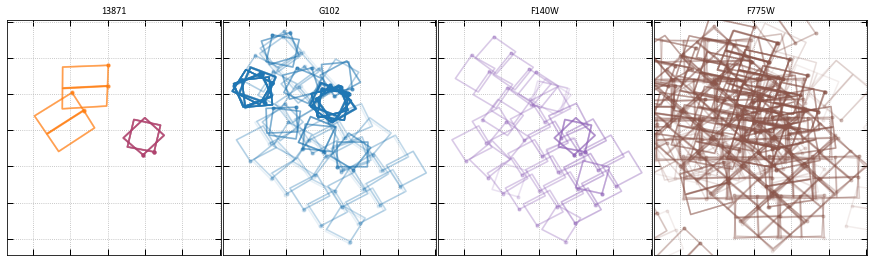

In [7]:
### Make a figure

fig = plt.figure(figsize=[12,3.5])

ax = fig.add_subplot(141)
query.show_footprints(tab, ax=ax)
ax.set_title('13871')

for i, filt in enumerate(filters):
    print(filt)    
    ax = fig.add_subplot(142+i)
    query.show_footprints(extras[extras['filter'] == filt], ax=ax)
    ax.set_title(filt)

for ax in fig.axes:        
    ax.set_xlim(189.46939409999999, 188.89701790000001)
    ax.set_ylim(62.078094353454389, 62.402351754992722)
    ax.grid()
    ax.set_xticklabels([])
    ax.set_yticklabels([])

fig.tight_layout(pad=0.2)